In [1]:
# Importing All the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as mplot
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

In [5]:
# Reading CSV File

loanData = pd.read_csv('loan_csv_data.csv')
loanData.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
# Checking Shape
loanData.shape

(39717, 111)

In [8]:
# Checking entire data file
loanData.info

<bound method DataFrame.info of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ...   

In [9]:
# Checking the column Types

loanData.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [10]:
# Now the Data cleaning

# 1. Check for duplicate rows in dataset based on id column

print(loanData.duplicated(subset=None, keep='first').count())

dup = loanData[loanData.duplicated(['id'])]
dup

39717


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


In [11]:
# 2. Checking for empty rows

print("Total Number of Empty Rows")
loanData.isnull().all(axis=1).sum()

Total Number of Empty Rows


0

In [12]:
# 3. Checking for empty columns

print("Total Number of Empty Columns")
loanData.isnull().all(axis=0).sum()

Total Number of Empty Columns


54

In [13]:
#4. Lets find Which columns have all null values

loanData.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [14]:
# 5. Lets Drop columns where all values are null.

loanData.drop(loanData.iloc[:, 53:105], inplace = True, axis = 1)

# column_drop_list = ["mths_since_last_major_derog"]
# loanData.drop(labels=column_drop_list, axis=1, inplace=True)

loanData.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.0,NaN,1,INDIVIDUAL,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,0.0,NaN,1,INDIVIDUAL,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.0,NaN,1,INDIVIDUAL,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.0,NaN,1,INDIVIDUAL,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.0,NaN,1,INDIVIDUAL,0.0,0.0,NaN,NaN,NaN,NaN


In [15]:
#Now check the shape again
loanData.shape

(39717, 59)

In [16]:
# Formatting emp_length as this plays important role in analysis

loanData.emp_length.fillna(0, inplace=True)

loanData['emp_length'] = loanData.emp_length.str.extract('(\d+)')

loanData.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.0,NaN,1,INDIVIDUAL,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,0.0,NaN,1,INDIVIDUAL,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.0,NaN,1,INDIVIDUAL,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.0,NaN,1,INDIVIDUAL,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.0,NaN,1,INDIVIDUAL,0.0,0.0,NaN,NaN,NaN,NaN


In [18]:
# 7. # Lets remove % symbol from intrest rate column
loanData['int_rate'] = loanData['int_rate'].str.rstrip('%')

loanData['revol_util'] = loanData['revol_util'].str.rstrip('%')

loanData.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,0.0,NaN,1,INDIVIDUAL,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,0.0,NaN,1,INDIVIDUAL,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,0.0,NaN,1,INDIVIDUAL,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,0.0,NaN,1,INDIVIDUAL,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,0.0,NaN,1,INDIVIDUAL,0.0,0.0,NaN,NaN,NaN,NaN


In [19]:
# convert amount columns into numeric data to find some correlation among important ones.

cols1 = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
loanData[cols1] = loanData[cols1].apply(pd.to_numeric)

loanData.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,0.0,NaN,1,INDIVIDUAL,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,0.0,NaN,1,INDIVIDUAL,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,0.0,NaN,1,INDIVIDUAL,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,0.0,NaN,1,INDIVIDUAL,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,0.0,NaN,1,INDIVIDUAL,0.0,0.0,NaN,NaN,NaN,NaN


In [20]:
(loanData.loan_status.value_counts() * 100) / len(loanData)

# Observations.
# 82.96 percent loans were fully paid.
# Close to 14% loans were charged off.

Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

In [21]:
# Lets take a look on important variable purpose of loan in total loans issued

(loanData.purpose.value_counts()*100) / len(loanData)

debt_consolidation    46.934562
credit_card           12.916383
other                 10.053629
home_improvement       7.493013
major_purchase         5.506458
small_business         4.602563
car                    3.900093
wedding                2.384369
medical                1.744845
moving                 1.467885
vacation               0.959287
house                  0.959287
educational            0.818289
renewable_energy       0.259335
Name: purpose, dtype: float64

In [23]:
# Lets derive some new columns using existing data as it may further used in analysis.
# create month and year columns separately

loanData.issue_d = pd.to_datetime(loanData.issue_d, format='%b-%y')
loanData['year'] = loanData['issue_d'].dt.year
loanData['month'] = loanData['issue_d'].dt.month

loanData.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,policy_code,application_type,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,year,month
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,1,INDIVIDUAL,0.0,0.0,NaN,NaN,NaN,NaN,2011,12


In [24]:
#Univariate Analysis

loanData['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<AxesSubplot:xlabel='loan_amnt'>

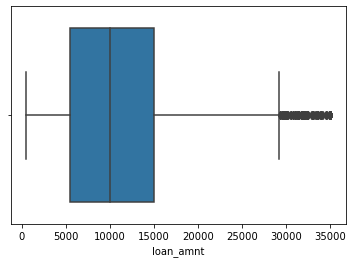

In [25]:
#plot the boxplot for loan amount

sns.boxplot(loanData.loan_amnt)

In [26]:
loanData['total_pymnt'].describe()

count    39717.000000
mean     12153.596544
std       9042.040766
min          0.000000
25%       5576.930000
50%       9899.640319
75%      16534.433040
max      58563.679930
Name: total_pymnt, dtype: float64

<AxesSubplot:xlabel='total_pymnt'>

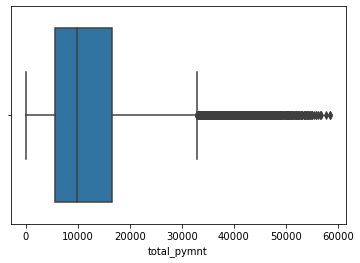

In [27]:
#plot the boxplot for total payment

sns.boxplot(loanData.total_pymnt)

In [28]:
print('Before Removal of Outliers :\n')
print(loanData['annual_inc'].describe())


Before Removal of Outliers :

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


In [27]:
# Data cleaning
# Remove Outliers quantile .99 from Annual Income
# it will make it easier to visualize the plots.

loanData = loanData[loanData["annual_inc"] < loanData["annual_inc"].quantile(0.99)]

print('After Removal of Outliers :')
print(loanData["annual_inc"].describe())

After Removal of Outliers :
count     39319.000000
mean      65524.215803
std       35215.885297
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       81000.000000
max      234996.000000
Name: annual_inc, dtype: float64


<AxesSubplot:xlabel='annual_inc'>

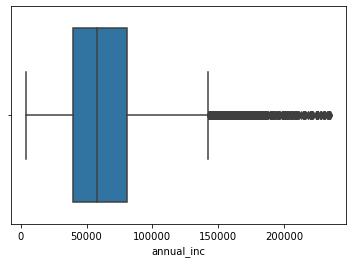

In [29]:
sns.boxplot(loanData.annual_inc)

In [31]:
# Basic statistics with .describe() -Quantitative Variables

loanData['int_rate'].describe()

count    39319.000000
mean        12.006142
std          3.717367
min          5.420000
25%          9.250000
50%         11.830000
75%         14.540000
max         24.590000
Name: int_rate, dtype: float64

<AxesSubplot:xlabel='int_rate'>

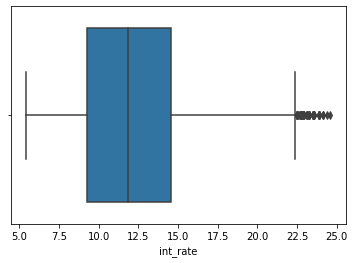

In [33]:
sns.boxplot(loanData.int_rate)

In [ ]:
#Correlation Matrix - Quantitative Variables

In [43]:
# Data cleaning
# Drop additional columns which are not needed further in analysis.

loanData.dtypes

id                                      int64
member_id                               int64
loan_amnt                               int64
funded_amnt                             int64
funded_amnt_inv                       float64
term                                   object
int_rate                              float64
grade                                  object
sub_grade                              object
emp_title                              object
emp_length                            float64
home_ownership                         object
annual_inc                            float64
verification_status                    object
issue_d                        datetime64[ns]
loan_status                            object
url                                    object
desc                                   object
purpose                                object
title                                  object
zip_code                               object
addr_state                        

In [29]:
# Derived columns
# categorise loan amounts into buckets
loanData['loan_amnt_cats'] = pd.cut(loanData['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# categorise annual incomes into buckets
loanData['annual_inc_cats'] = pd.cut(loanData['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# categorise intrest rates into buckets
loanData['int_rate_cats'] = pd.cut(loanData['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

# categorise dti into buckets
loanData['dti_cats'] = pd.cut(loanData['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

In [31]:
# Lets take a look on shape and data
print(loanData.shape)
loanData.head(1)

(39717, 65)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,year,month,loan_amnt_cats,annual_inc_cats,int_rate_cats,dti_cats
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,2011,12,0-7000,20000-40000,10-13,NaN


In [ ]:
#Univariate Analysis

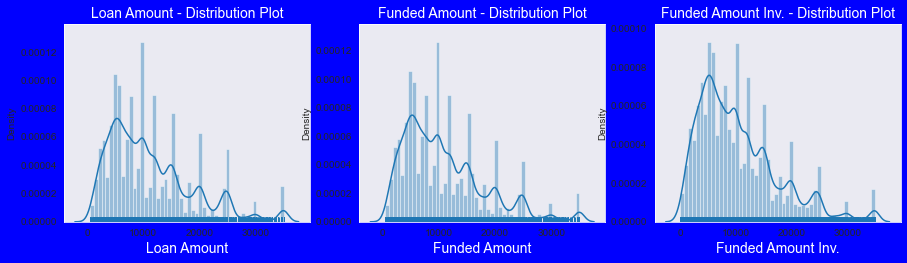

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")

# subplot 1
plt.subplot(2, 3, 1)
ax = sns.distplot(loanData['loan_amnt'], rug = True)
ax.set_title('Loan Amount - Distribution Plot', fontsize=14, color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')

# subplot 2
plt.subplot(2, 3, 2)
ax = sns.distplot(loanData['funded_amnt'], rug = True)
ax.set_title('Funded Amount - Distribution Plot', fontsize=14, color='w')
ax.set_xlabel('Funded Amount',fontsize=14,color='w')

# subplot 3
plt.subplot(2, 3, 3)
ax = sns.distplot(loanData['funded_amnt_inv'], rug = True)
ax.set_title('Funded Amount Inv. - Distribution Plot', fontsize=14, color='w')
ax.set_xlabel('Funded Amount Inv.',fontsize=14,color='w')
plt.show()

# Observation: 
# Distribution of amounts for all three looks very much similar.

#So we can consider only loan amount column for rest of our analysis.

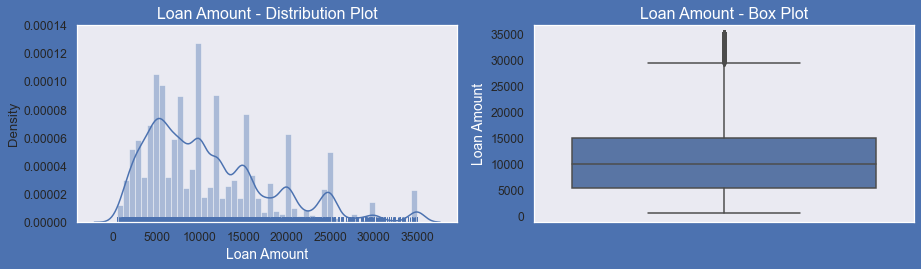

In [51]:
# Univariate Analysis on Loan amount

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")

# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loanData['loan_amnt'], rug = True)
ax.set_title('Loan Amount - Distribution Plot', fontsize=16, color='w')
ax.set_xlabel('Loan Amount', fontsize=14, color='w')

# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loanData['loan_amnt'])
ax.set_title('Loan Amount - Box Plot', fontsize=16, color='w')
ax.set_ylabel('Loan Amount', fontsize=14, color='w')
plt.show()

# Observations :
# Below plots show that most of the Loan amounts are in range of 5000 - 15000

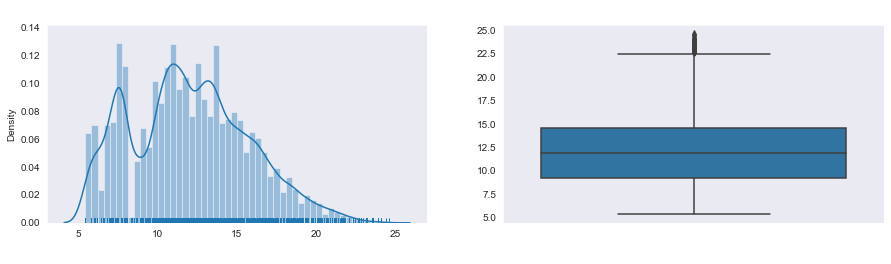

In [60]:
# Univariate Analysis on Intrest Rate-Quantitative Variables

plt.figure(figsize=(15,8), facecolor='w')
sns.set_style("dark")

# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loanData['int_rate'], rug = True)
ax.set_title('Interest Rate - Distribution Plot', fontsize=16, color='w')
ax.set_xlabel('Interest Rate', fontsize=14, color='w')

# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loanData['int_rate'])
ax.set_title('Interest Rate - Box Plot', fontsize=16, color='w')
ax.set_ylabel('Interest Rate', fontsize=14, color='w')
plt.show()

# Observations :
# Below plots show that most of the Interest Rates on loans are in range of 10% - 15%

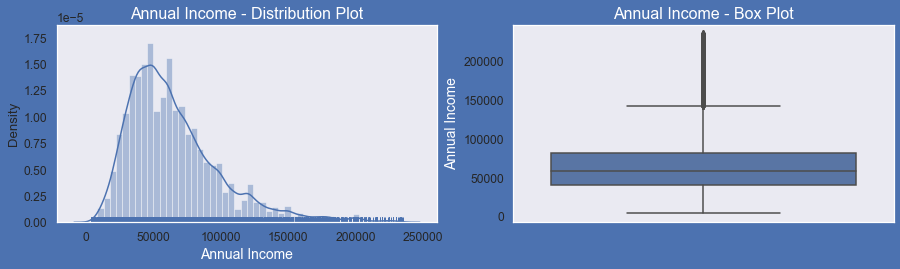

In [54]:
# Univariate Analysis on Annual Income - Quantitative Variables

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")

# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loanData['annual_inc'],rug = True)
ax.set_title('Annual Income - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Annual Income',fontsize=14,color='w')

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Annual Income - Box Plot')
ax = sns.boxplot(y=loanData['annual_inc'])
ax.set_title('Annual Income - Box Plot', fontsize=16,color='w')
ax.set_ylabel('Annual Income',fontsize=14,color='w')
plt.show()

# Observations :
# Below plots show that most of the borrower's Annual incomes are in range of 40000- 80000

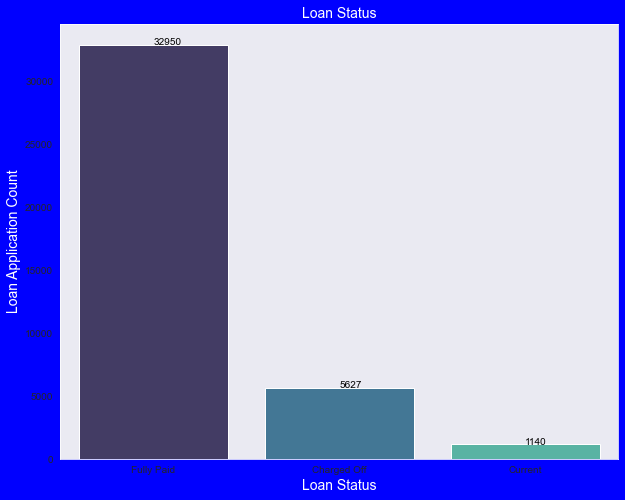

In [35]:
# Univariate Analysis - Unordered Categorical Variables - Loan Status

plt.figure(figsize=(10,8), facecolor='b')
sns.set_style("dark")

ax = sns.countplot(x="loan_status", data=loanData, palette='mako')
ax.set_title('Loan Status', fontsize=14, color='w')
ax.set_xlabel('Loan Status', fontsize=14, color = 'w')
ax.set_ylabel('Loan Application Count', fontsize=14, color = 'w')

# To show count of values above bars
s=loanData['loan_status'].value_counts()
for i, v in s.reset_index().iterrows():
    ax.text(i, v.loan_status + 0.3 , v.loan_status, color='k')

# Observations :
# Below plot shows that close to 14% loans were charged off out of total loan issued.

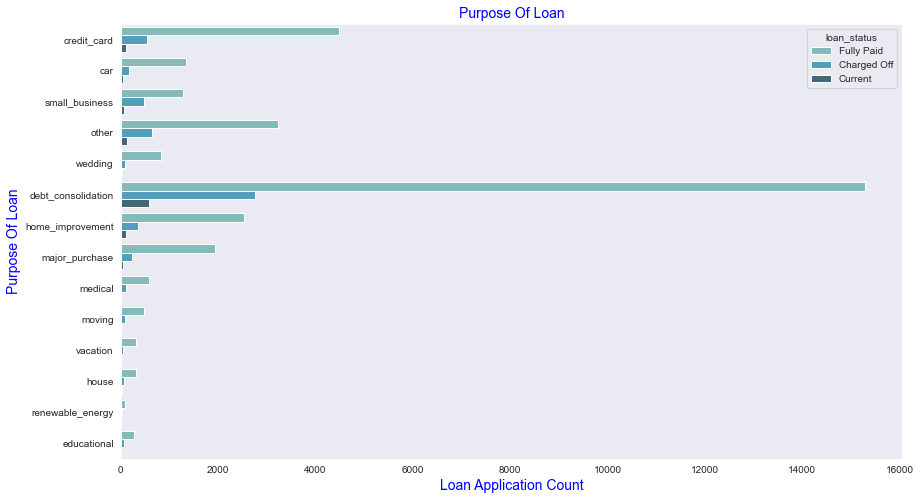

In [66]:
# Univariate Analysis - Unordered Categorical Variables - Purpose Of Loan

plt.figure(figsize=(14,8), facecolor='w')
sns.set_style("dark")

ax = sns.countplot(y="purpose", data=loanData, hue='loan_status', palette='GnBu_d')
ax.set_title('Purpose Of Loan', fontsize=14, color='b')
ax.set_ylabel('Purpose Of Loan', fontsize=14, color = 'b')
ax.set_xlabel('Loan Application Count', fontsize=14, color = 'b')
plt.show()

# Observations :
# Below plot shows that most of the loans were taken for the purpose of debt consolidation & paying credit card bill.

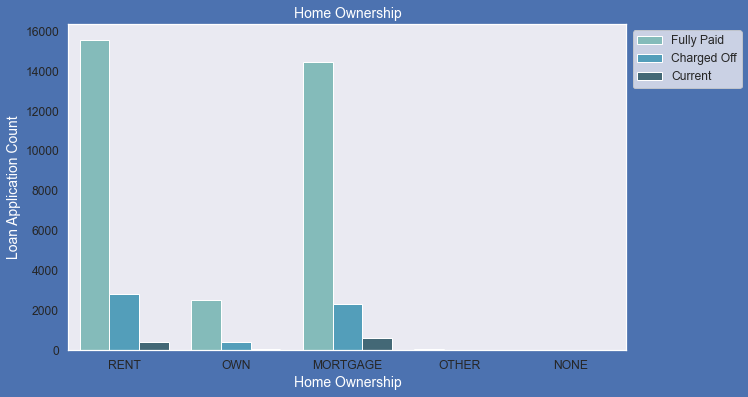

In [58]:
# Univariate Analysis - Unordered Categorical Variables - Home Ownership

plt.figure(figsize=(10,6),facecolor='b')

ax = sns.countplot(x="home_ownership",data=loanData,hue='loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color='w')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

# Observations :
# Below plot shows that most of them living in rented home or mortgazed their home.
# Applicant numbers are high from these categories so charged off is high too.

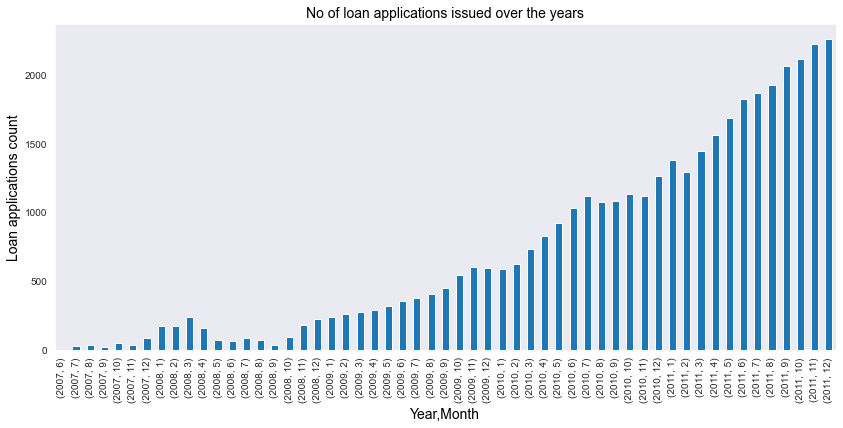

In [68]:
# Derived Column - Ordered Categorical Variables

plt.figure(figsize=(14,6),facecolor='w')
loanData.groupby(['year','month']).id.count().plot(kind='bar')
plt.ylabel('Loan applications count', fontsize=14, color='k')
plt.xlabel('Year,Month', fontsize=14, color = 'k')      
plt.title("No of loan applications issued over the years",fontsize=14,color='k')
plt.show()


# Observation is that count of loan application is increasing every passing year.

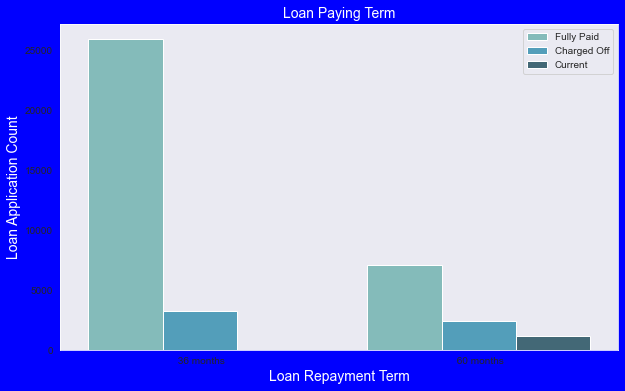

In [39]:
# Univariate Analysis - Ordered Categorical Variables- Loan Paying Term

plt.figure(figsize=(10,6),facecolor='b')
ax = sns.countplot(x="term", data=loanData, hue='loan_status', palette='GnBu_d')
ax.set_title('Loan Paying Term', fontsize=14, color='w')
ax.set_xlabel('Loan Repayment Term', fontsize=14, color = 'w')
ax.set_ylabel('Loan Application Count', fontsize=14, color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

# Observations :
# Below plot shows that those who had taken loan to repay in 60 months had more % of number of applicants getting

In [ ]:
#Bivariate Analysis

In [40]:
# Bivariate Analysis on annual income against Chargedoff_Proportion -

inc_range_vs_loan = loanData.groupby(['annual_inc_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Current'] + inc_range_vs_loan['Fully Paid'] 
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.
# Notice that with increase in annual income charged off proportion got decreased. 

loan_status,annual_inc_cats,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,237,9,943,1189,0.199327
1,20000-40000,1514,170,7004,8688,0.174263
2,40000-60000,1729,345,9534,11608,0.148949
3,60000-80000,1024,240,6597,7861,0.130263
4,80000 +,1122,376,8859,10357,0.108333


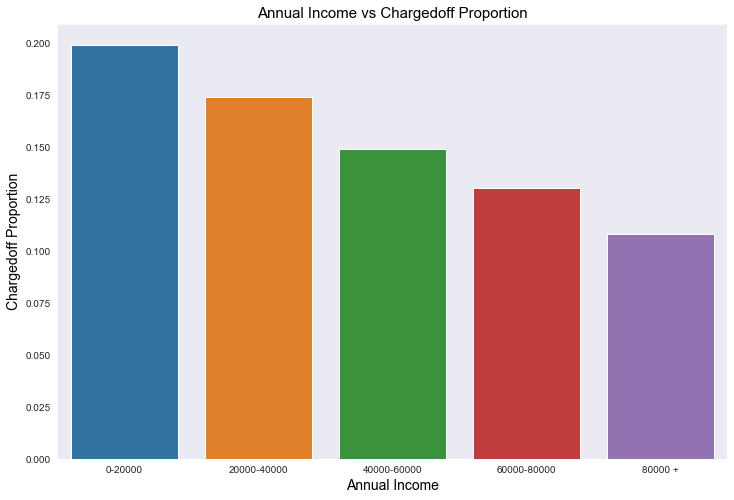

In [70]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='w')
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15,color = 'k')
ax1=sns.barplot(x='annual_inc_cats', y='Chargedoff_Proportion', data=inc_range_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'k')
ax1.set_xlabel('Annual Income',fontsize=14,color='k')
plt.show()

# Observations:
# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.

In [43]:
# Bivariate Analysis on purpose of Loan against Chargedoff_Proportion.

purpose_vs_loan = loanData.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Current'] + purpose_vs_loan['Fully Paid'] 
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# small Business applicants have high chnaces of getting charged off.
# renewable_energy where chanrged off proportion is better as compare to other categories.

loan_status,purpose,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
11,small_business,475.0,74.0,1279.0,1828.0,0.259847
10,renewable_energy,19.0,1.0,83.0,103.0,0.184466
3,educational,56.0,0.0,269.0,325.0,0.172308
9,other,633.0,128.0,3232.0,3993.0,0.158527
8,moving,92.0,7.0,484.0,583.0,0.157804
5,house,59.0,14.0,308.0,381.0,0.154856
7,medical,106.0,12.0,575.0,693.0,0.152958
2,debt_consolidation,2767.0,586.0,15288.0,18641.0,0.148436
12,vacation,53.0,6.0,322.0,381.0,0.139108
4,home_improvement,347.0,101.0,2528.0,2976.0,0.116599


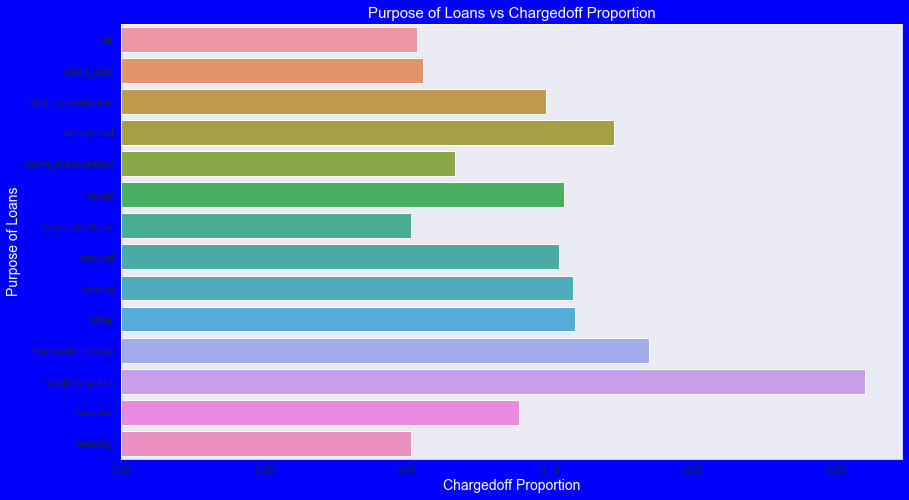

In [44]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(14, 8), facecolor='b')
ax1.set_title('Purpose of Loans vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(y='purpose', x='Chargedoff_Proportion', data=purpose_vs_loan)
ax1.set_ylabel('Purpose of Loans', fontsize=14, color='w')
ax1.set_xlabel('Chargedoff Proportion', fontsize=14, color = 'w')
plt.show()

# Observations:
# small Business applicants have high chances of getting charged off.
# renewable_energy where chanrged off proportion is better as compare to other categories.

In [45]:
# Bivariate Analysis on grade against Chargedoff_Proportion

grade_vs_loan = loanData.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Current'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Grade "A" has very less chances of charged off.
# Grade "F" and "G" have very high chances of charged off.
# Chances of charged off is increasing with grade moving from "A" towards "G"

loan_status,grade,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
6,G,101,17,198,316,0.319620
5,F,319,73,657,1049,0.304099
4,E,715,179,1948,2842,0.251583
3,D,1118,222,3967,5307,0.210665
2,C,1347,264,6487,8098,0.166337
1,B,1425,345,10250,12020,0.118552
0,A,602,40,9443,10085,0.059693


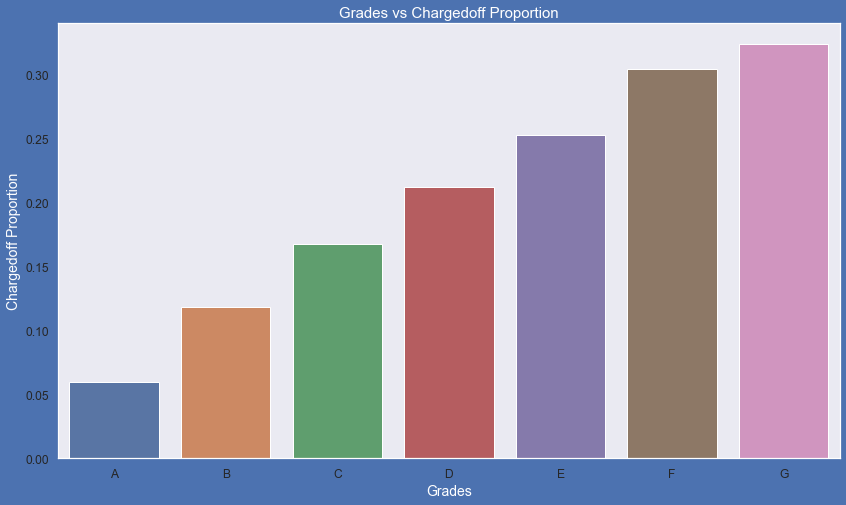

In [66]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='b')
ax1.set_title('Grades vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Grades',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color ='w')
plt.show()

# Observations:
# Grade "A" has very less chances of charged off.
# Grade "F" and "G" have very high chances of charged off.
# Chances of charged of is increasing with grade moving from "A" towards "G"

In [54]:
# Understanding grades better

grade_vs_loan = loanData.groupby(['sub_grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Current'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,sub_grade,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
29,F5,54.0,5.0,59.0,118.0,0.457627
32,G3,19.0,3.0,26.0,48.0,0.395833
31,G2,28.0,1.0,49.0,78.0,0.358974
34,G5,10.0,1.0,19.0,30.0,0.333333
28,F4,53.0,17.0,98.0,168.0,0.315476
30,G1,31.0,10.0,63.0,104.0,0.298077
26,F2,70.0,16.0,163.0,249.0,0.281124
23,E4,126.0,30.0,298.0,454.0,0.277533
25,F1,91.0,24.0,214.0,329.0,0.276596
27,F3,51.0,11.0,123.0,185.0,0.275676


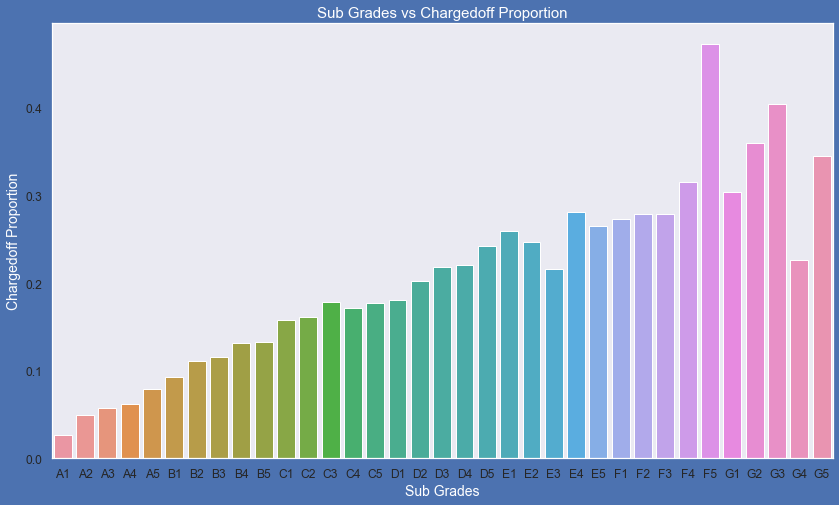

In [68]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='b')
ax1.set_title('Sub Grades vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='sub_grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Sub Grades',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# sub Grades of "A" has very less chances of charged off.
# sub Grades of "F" and "G" have very high chances of charged off.
# proportion of charged off is increasing with sub grades moving from sub grades of "A" towards sub grades of "G"

In [55]:
# Bivariate Analysis on interest rate against Chargedoff_Proportion

interest_vs_loan = loanData.groupby(['int_rate_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off'] + interest_vs_loan['Current'] + interest_vs_loan['Fully Paid'] 
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# interest rate less than 10% has very less chances of charged off. Intrest rates are starting from minimin 5 %.
# interest rate more than 16% has good chnaces of charged off as compared to other category intrest rates.
# Charged off proportion is increasing with higher intrest rates.

loan_status,int_rate_cats,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
3,16 +,1266,359,3372,4997,0.253352
2,12.5-16,2003,332,9470,11805,0.169674
1,10-13,1232,270,8148,9650,0.127668
0,0-10,830,77,11486,12393,0.066973


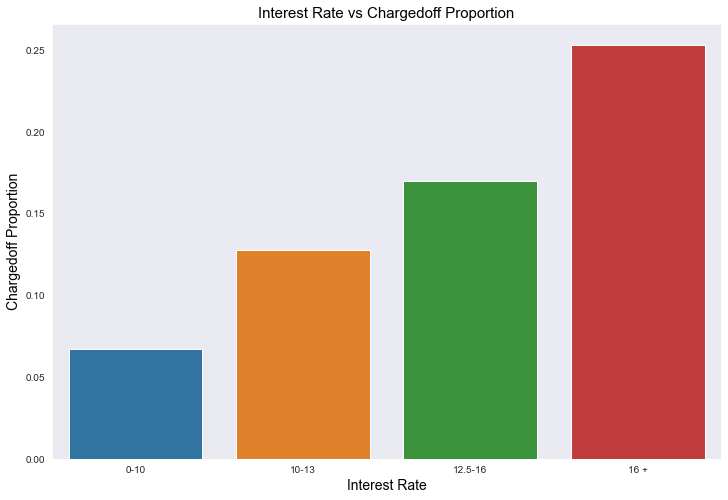

In [71]:
# Lets draw some bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='w')
ax1.set_title('Interest Rate vs Chargedoff Proportion',fontsize=15,color='k')
ax1=sns.barplot(x='int_rate_cats', y='Chargedoff_Proportion', data=interest_vs_loan)
ax1.set_xlabel('Interest Rate',fontsize=14,color='k')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'k')
plt.show()

# Observations:
# interest rate less than 10% has very less chances of charged off. Intrest rates are starting from minimin 5 %.
# interest rate more than 16% has good chnaces of charged off as compared to other category intrest rates.
# Charged off proportion is increasing with higher intrest rates.

In [52]:
# Bivariate Analysis on employment length against Chargedoff_Proportion

emplen_vs_loan = loanData.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplen_vs_loan['Total'] = emplen_vs_loan['Charged Off'] + emplen_vs_loan['Current'] + emplen_vs_loan['Fully Paid'] 
emplen_vs_loan['Chargedoff_Proportion'] = emplen_vs_loan['Charged Off'] / emplen_vs_loan['Total']
emplen_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Those who are not working or have less than 1 year of work experience have high chances of getting charged off.
# It makes sense as with less or no experience they don't have source of income to repay loan.
# Rest of the applicants have more or less same chnaces of getting charged off.

loan_status,emp_length,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
9,10.0,1331,391,7157,8879,0.149904
6,7.0,263,62,1448,1773,0.148336
0,1.0,1095,146,6582,7823,0.139972
4,5.0,458,88,2736,3282,0.139549
5,6.0,307,61,1861,2229,0.137730
7,8.0,203,44,1232,1479,0.137255
2,3.0,555,83,3457,4095,0.135531
3,4.0,462,94,2880,3436,0.134459
1,2.0,567,97,3724,4388,0.129216
8,9.0,158,32,1068,1258,0.125596


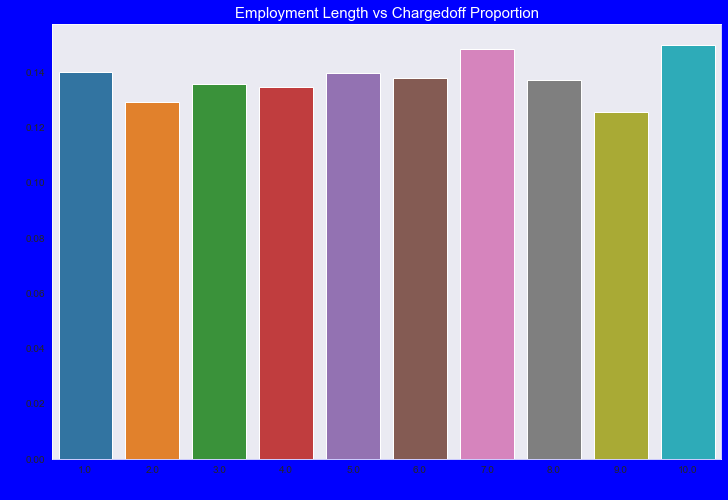

In [53]:
# Lets draw bar plots on data calculated above.

fig, ax1 = plt.subplots(figsize=(12, 8), facecolor='b')
ax1.set_title('Employment Length vs Chargedoff Proportion', fontsize=15, color='w')
ax1=sns.barplot(x='emp_length', y='Chargedoff_Proportion', data=emplen_vs_loan)
ax1.set_xlabel('Employment Length', fontsize=14, color='b')
ax1.set_ylabel('Chargedoff Proportion', fontsize=14, color = 'b')
plt.show()

# Observations:
# Those who are not working or have less than 1 year of work experience have high chances of getting charged off.
# It makes sense as with less or no experience they don't have source of income to repay loan.

In [73]:
# Bivariate Analysis on address state against Chargedoff_Proportion

state_vs_loan = loanData.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
state_vs_loan['Total'] = state_vs_loan['Charged Off'] + state_vs_loan['Current'] + state_vs_loan['Fully Paid'] 
state_vs_loan['Chargedoff_Proportion'] = state_vs_loan['Charged Off'] / state_vs_loan['Total']
state_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# states NE has very high chances of charged off but number of applications are too low to make any decisions.
# NV,CA and FL states shows good number of charged offs in good number of applications.

loan_status,addr_state,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
28,NE,3.0,0.0,2.0,5.0,0.600000
32,NV,107.0,17.0,368.0,492.0,0.217480
40,SD,12.0,2.0,50.0,64.0,0.187500
0,AK,14.0,2.0,63.0,79.0,0.177215
9,FL,497.0,85.0,2252.0,2834.0,0.175371
24,MO,114.0,16.0,551.0,681.0,0.167401
13,ID,1.0,0.0,5.0,6.0,0.166667
31,NM,30.0,5.0,149.0,184.0,0.163043
11,HI,28.0,8.0,138.0,174.0,0.160920
4,CA,1116.0,149.0,5767.0,7032.0,0.158703


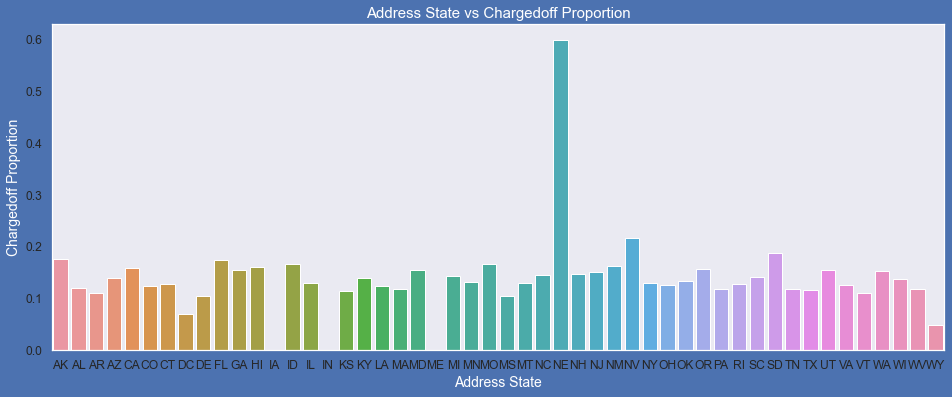

In [74]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(16, 6),facecolor='b')
ax1.set_title('Address State vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='addr_state', y='Chargedoff_Proportion', data=state_vs_loan)
ax1.set_xlabel('Address State',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# states NE has very high chances of charged off but number of applications are too low to make any decisions.
# NV,CA and FL states shows good number of charged offs in good number of applications.

In [75]:
# Bivariate Analysis on verification_status against Chargedoff_Proportion

verfy_vs_loan = loanData.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verfy_vs_loan['Total'] = verfy_vs_loan['Charged Off'] + verfy_vs_loan['Current'] + verfy_vs_loan['Fully Paid'] 
verfy_vs_loan['Chargedoff_Proportion'] = verfy_vs_loan['Charged Off'] / verfy_vs_loan['Total']
verfy_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# There is not much difference in charged off proportion.
# This variable doesn't provide any insights for charged off.

loan_status,verification_status,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
2,Verified,2032,593,10000,12625,0.160950
1,Source Verified,1422,306,8135,9863,0.144175
0,Not Verified,2130,227,14474,16831,0.126552


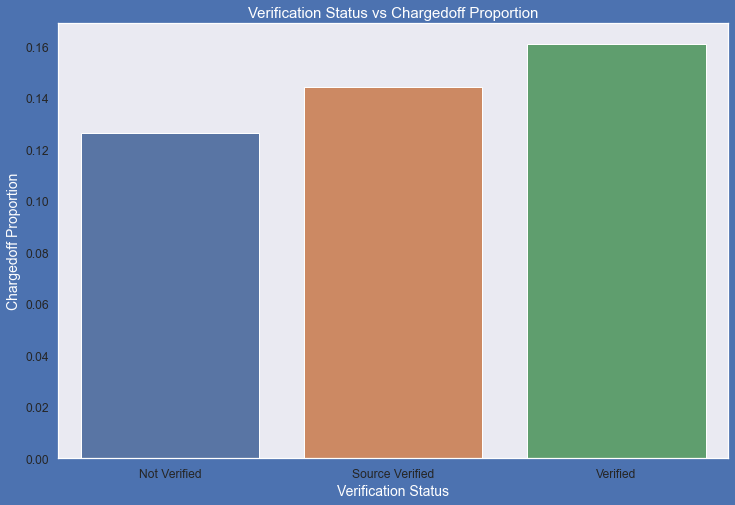

In [76]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Verification Status vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='verification_status', y='Chargedoff_Proportion', data=verfy_vs_loan)
ax1.set_xlabel('Verification Status',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# There is not much difference in charged off proportion.
# This variable doesn't provide any insights for charged off.

In [77]:
# Bivariate Analysis on pub_rec_bankruptcies against Chargedoff_Proportion

bankruptcies_vs_loan = loanData.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan['Total']=bankruptcies_vs_loan['Charged Off']+bankruptcies_vs_loan['Current']+bankruptcies_vs_loan['Fully Paid'] 
bankruptcies_vs_loan['Chargedoff_Proportion'] = bankruptcies_vs_loan['Charged Off'] / bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Those who already have pub_rec_bankruptcies value 1, have charged off proportion higher than who have no pub_rec_bankruptcies.
# pub_rec_bankruptcies count 2 has even higher charged off proportion but those numbers are not significant to decide.
# Not known is the column for which we don't have any information abount borrower.
# This also makes sense that who has defaulted before has more chances of dafaulting in future as well.

loan_status,pub_rec_bankruptcies,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
2,2.0,2,2,3,7,0.285714
1,1.0,365,37,1268,1670,0.218563
0,0.0,5101,1087,30766,36954,0.138036


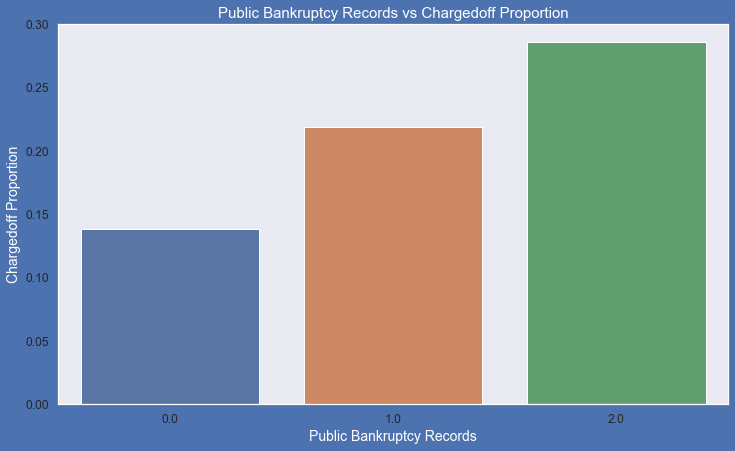

In [78]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 7),facecolor='b')
ax1.set_title('Public Bankruptcy Records vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='pub_rec_bankruptcies', y='Chargedoff_Proportion', data=bankruptcies_vs_loan)
ax1.set_xlabel('Public Bankruptcy Records',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# Those who already have pub_rec_bankruptcies value 1, have charged off proportion higher than who have no pub_rec_bankruptcies.
# pub_rec_bankruptcies count 2 has even higher charged off proportion but those numbers are not significant to decide.
# Not known is the column for which we don't have any information abount borrower.
# This also makes sense that who has defaulted before has more chances of dafaulting in future as well.

In [58]:
# Bivariate Analysis on Derogatory Public Record against Chargedoff_Proportion

bankruptcies_vs_loan = loanData.groupby(['pub_rec', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan['Total']=bankruptcies_vs_loan['Charged Off']+bankruptcies_vs_loan['Current']+bankruptcies_vs_loan['Fully Paid'] 
bankruptcies_vs_loan['Chargedoff_Proportion'] = bankruptcies_vs_loan['Charged Off'] / bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# A derogatory item is an entry that may be considered negative by lenders because it indicates risk and hurts 
# your ability to qualify for credit or other services. Public records and collections are derogatory items
# because they reflect financial obligations that were not paid as agreed.
# Those who already have pub_rec value 1 or 2 have charged off chances higher than who have no Derogatory Public Record.
# pub_rec count 3-4 has less numbers so cannot reach on any conclusions.

loan_status,pub_rec,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
1,1,457.0,43.0,1556.0,2056.0,0.222276
2,2,10.0,3.0,38.0,51.0,0.196078
0,0,5160.0,1094.0,31347.0,37601.0,0.137230
3,3,0.0,0.0,7.0,7.0,0.000000
4,4,0.0,0.0,2.0,2.0,0.000000


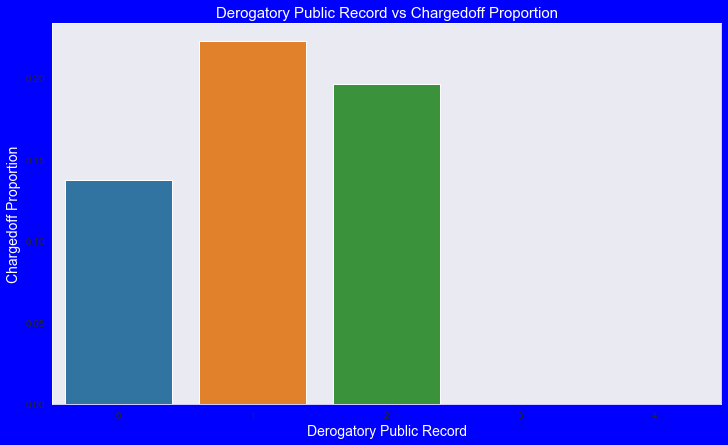

In [59]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 7),facecolor='b')
ax1.set_title('Derogatory Public Record vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='pub_rec', y='Chargedoff_Proportion', data=bankruptcies_vs_loan)
ax1.set_xlabel('Derogatory Public Record',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# A derogatory item is an entry that may be considered negative by lenders because it indicates risk and hurts 
# your ability to qualify for credit or other services. Public records and collections are derogatory items
# because they reflect financial obligations that were not paid as agreed.
# Those who already have pub_rec value 1 or 2 have charged off chances higher than who have no Derogatory Public Record.
# pub_rec count 3-4 has less numbers so cannot reach on any conclusions.

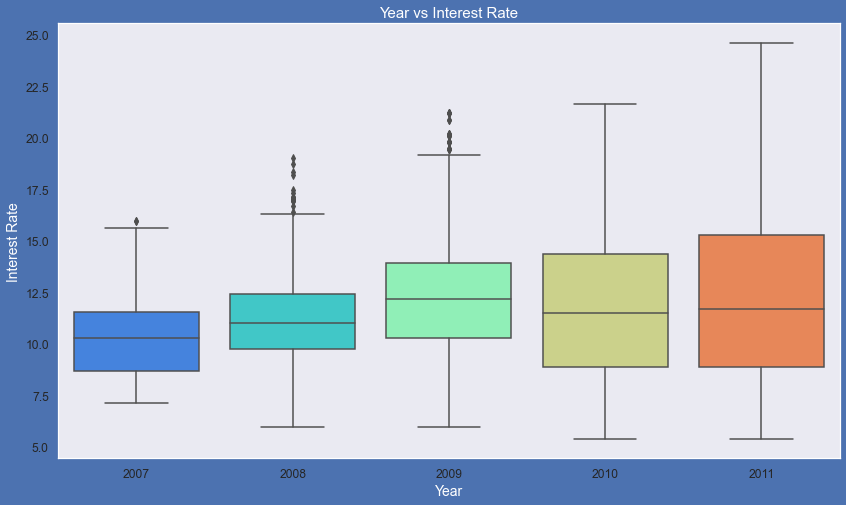

In [93]:
# Bivariate Analysis - year vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(y='int_rate', x='year', data =loanData,palette='rainbow')
ax.set_title('Year vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Year',fontsize=14,color = 'w')
plt.show()

# Observations:
# Plot shows intrest rate is increasing slowly with increase in year.